In [3]:
from src.Utils import get_means
from src.ExistingAlgorithms import sklearn_available
from src.GaussianMixture import gaussian_mixture

from sklearn.manifold import TSNE
import polars as pl

In [4]:
PATH_SAVE_LD = 'src/Results_Uniform/Low Dimension'
PATH_SAVE_D = 'src/Results_Uniform/Density'
PATH_RESULTS = 'src/Results_Uniform'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/NIST CSV'

data_train = pl.read_csv(f'{PATH_DATA}/uniform_train.csv', has_header=False, separator=",").to_numpy()
data_test = pl.read_csv(f'{PATH_DATA}/uniform_test.csv', has_header=False, separator=",").to_numpy()
expected_prob = pl.read_csv(f'{PATH_DATA}/uniform_expected_prob.csv', has_header=False, separator=",").to_numpy()
db_train = pl.read_csv(f'{PATH_DATA}/db_train.csv', has_header=False, separator=",").to_numpy().flatten()
db_test = pl.read_csv(f'{PATH_DATA}/db_test.csv', has_header=False, separator=",").to_numpy().flatten()

In [6]:
X_l_tSNE = sklearn_available(data_train, data_test, PATH_SAVE_LD, TSNE,n_components=1, perplexity = 450)

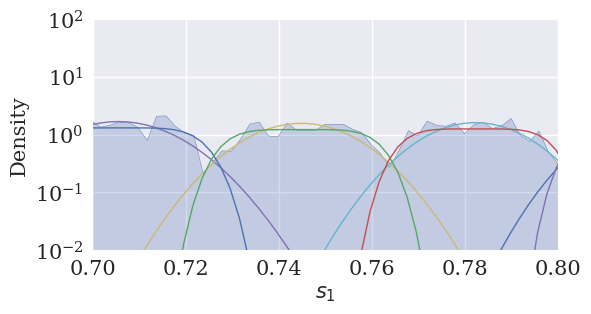

In [8]:
name_method = 'tSNE 1D genGauss'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 27,
                      cluster_iter = 5,
                      tol = 1e-3,
                      means_init = get_means(name_method, PATH_RESULTS),
                      info_sweep = 0,
                      plot_sweep = True)

gm.plot_density(bw_adjust=0.005, 
                plot_gaussians=True,
                plot_gen_gauss = True,
                xlim = (0.7,0.8),
                cluster_number = False)